# Mini-Proyecto 1
## Cyberbullying 
Alumnos:

José Alberto López Álvarez              
Irving Daniel Estrada López            
América Victoria Ramírez Cámara  

# Cargar datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('/Users/irvingestrada/Documents/Maestría/9- Procesamiento y Clasificacion de Datos/Datasets/cyberbullying_tweets.csv')

In [3]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [4]:
#dataset = dataset.sample(n=1000)

In [5]:
dataset.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [6]:
def value_counts_plot(df, column=None, top=None, fontsize=15):
    if top is not None:
        label_counts = df[column].value_counts().head(top)
    else:
        label_counts = df[column].value_counts()
    
    plt.figure(figsize=(15,10))
    plt.style.use('seaborn')
    if top is not None:
        bar_colors = cm.rainbow(np.linspace(0,1,top))
    else:
        bar_colors = cm.rainbow(np.linspace(0,1,len(df[column].unique())))
    plt.bar(label_counts.index.values,
            label_counts.values,
            color=bar_colors,
            linewidth=0,
            alpha=0.6)
    plt.tick_params(labelsize=fontsize)
    if top is not None:
        plt.xticks(rotation=-45, ha='left')
        plt.xlabel(f'{column} top {top}', fontsize=fontsize)
    else:
        plt.xlabel(column, fontsize=fontsize)
    plt.ylabel(f'{column} value counts', fontsize=fontsize)
    plt.show()

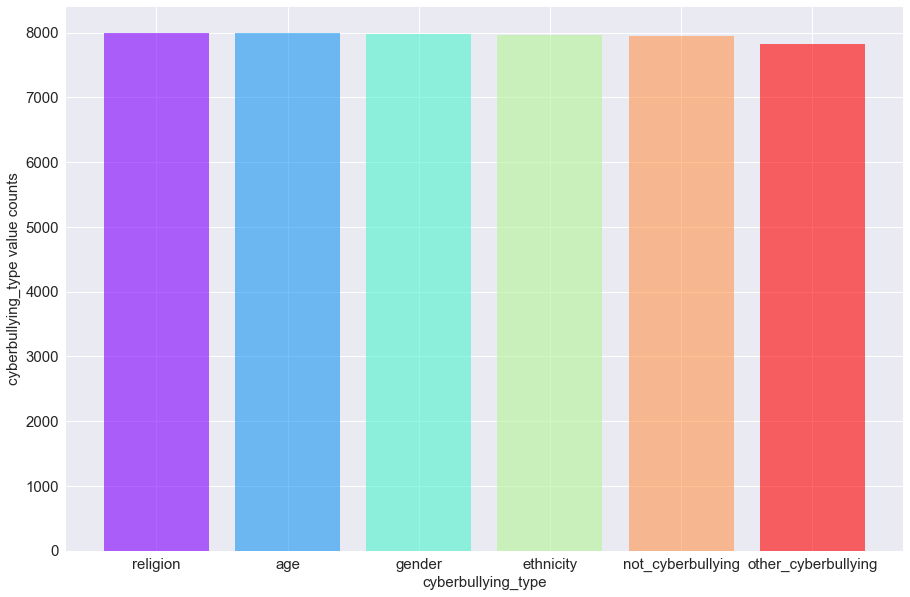

In [7]:
value_counts_plot(dataset, column='cyberbullying_type')

# Preprocesado

In [8]:
import re
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS

In [10]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

url_pattern = re.compile(r'https?://\S+|www\.\S+')

spell = SpellChecker(distance=2)
wordnet_lemmatizer = WordNetLemmatizer()

userPattern = '@[^\s]+'

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

In [11]:
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew


In [12]:
def data_clean(text):
    #Removing USER
    text = re.sub(userPattern, '',text)
    
    #Emoticons Transformation
    #text = convert_emoticons(text)
    
    #Removing Emojis
    #text = emoji_pattern.sub(r'', text)
    
    #Removing URL
    text = url_pattern.sub(r'', text)
    
    #Removing puctuations signs and numbers, lower cases
    text = re.sub('[^a-zA-Z]',' ',text).lower()
    
    #SpellChecker
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
            
#     text = " ".join(corrected_text)
    return text
    
    

In [13]:
sw = set(STOPWORDS)
newStopWords = ['bully','fuck','u','people','rt','tweet']
sw.update(newStopWords)

In [14]:
def clean2(text):
    #Lemmatizar
    text = lemmatize(text).split()
    
    #Removing StopWords
    text = [word for word in text if not word in sw]
    
    #text = " ".join(text)
    return text

In [15]:
dataset["Cleaned_Tweets"] = dataset["tweet_text"].apply(data_clean)

In [16]:
dataset["POS_tagged"] = dataset["Cleaned_Tweets"].apply(token_stop_pos)

In [17]:
dataset["Cleaned_Tweets"] = dataset["POS_tagged"].apply(clean2)

In [18]:
dataset = dataset.reset_index()

In [19]:
import plotly.express as px

In [20]:
def graph(column):
    fd = nltk.FreqDist(column)
    fd.plot(10,cumulative=False)

In [21]:
def graph_bar(ty,title):
    all_fdist = nltk.FreqDist(ty).most_common(20)
    all_fdist= pd.Series(dict(all_fdist))
    fig = px.bar(pd.DataFrame({'Words':all_fdist.index,
                   'Count': all_fdist.values,}),x='Words',y='Count',title=title)
    fig.show()

# Análisis de Texto por Categoría 

# All tweets

In [22]:
all_tweets = []
for i in range(len(dataset['Cleaned_Tweets'])):
    all_tweets.extend(dataset['Cleaned_Tweets'][i])

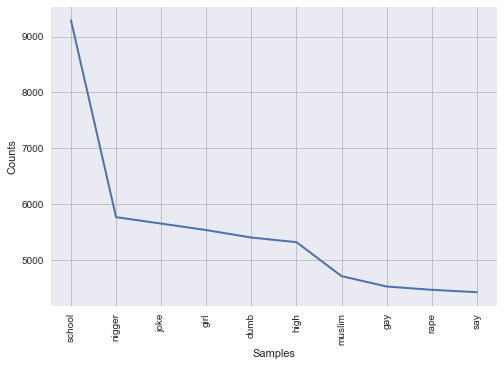

In [23]:
graph(all_tweets)

In [24]:
graph_bar(all_tweets,'All Tweets')

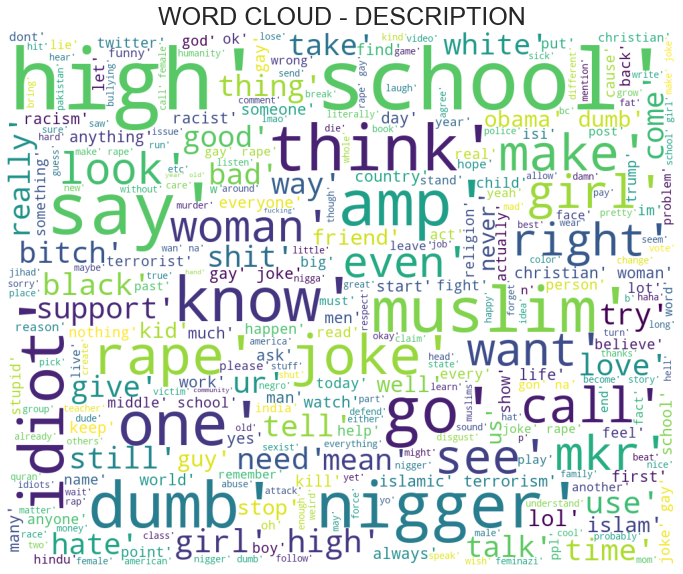

In [25]:
stopwords = set(STOPWORDS)

newStopWords = []
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(' '.join(dataset['Cleaned_Tweets'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Not Cyberbulling

In [26]:
not_cb = dataset.loc[(dataset['cyberbullying_type']) == "not_cyberbullying",['tweet_text','Cleaned_Tweets','cyberbullying_type',]]

In [27]:
not_cb.head()

tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                      Cleaned_Tweets cyberbullying_type  
0       [word, katandandre, food, crapilicious, mkr]  not_cyberbullying  
1  [aussietv, white, mkr, theblock, imacelebritya...  not_cyberbullying  
2              [classy, whore, red, velvet, cupcake]  not_cyberbullying  
3  [meh, p, thanks, head, concern, another, angry...  not_cyberbullying  
4  [isi, account, pretend, kurdish, account, isla...  not_cyberbullying

In [28]:
not_cyberbullying_tweets = []
for i in range(len(not_cb['Cleaned_Tweets'])):
    not_cyberbullying_tweets.extend(not_cb['Cleaned_Tweets'][i])

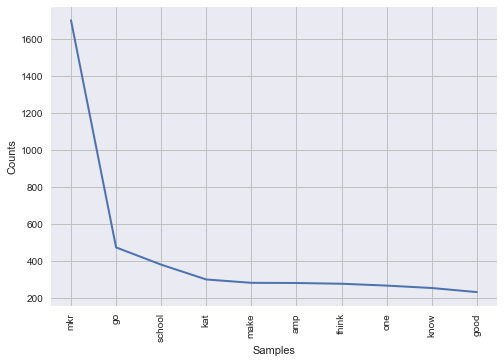

In [29]:
graph(not_cyberbullying_tweets)

In [30]:
graph_bar(not_cyberbullying_tweets,'Not Cyberbulling')

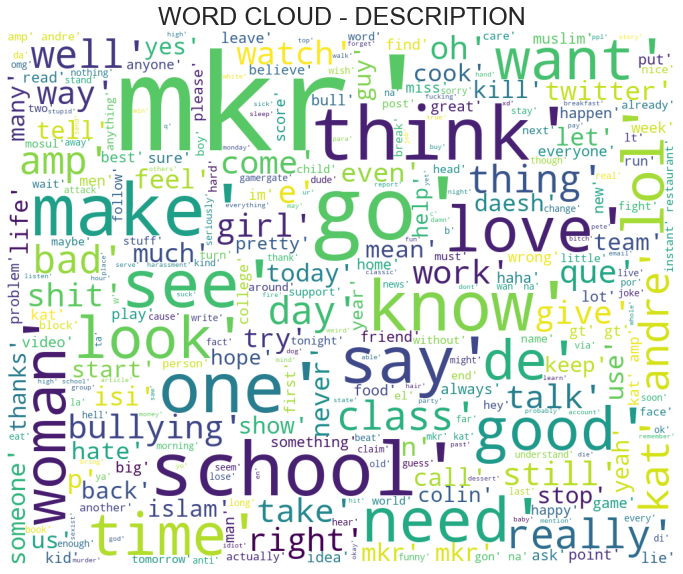

In [31]:
stopwords = set(STOPWORDS)

newStopWords = []
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(' '.join(not_cb['Cleaned_Tweets'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Ethnicity

In [32]:
ethnicity_cb = dataset.loc[(dataset['cyberbullying_type']) == "ethnicity",['tweet_text','Cleaned_Tweets','cyberbullying_type',]]

In [33]:
ethnicity_cb = ethnicity_cb.reset_index()

In [34]:
ethnicity_cb_tweets = []
for i in range(len(ethnicity_cb['Cleaned_Tweets'])):
    ethnicity_cb_tweets.extend(ethnicity_cb['Cleaned_Tweets'][i])

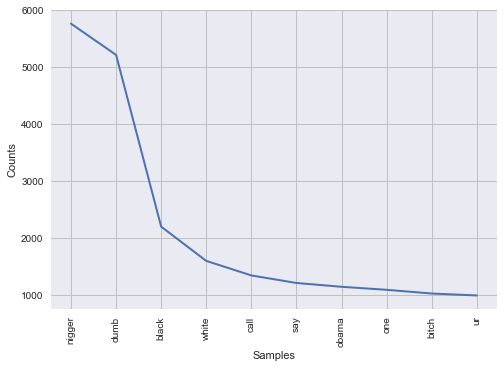

In [35]:
graph(ethnicity_cb_tweets)

In [36]:
graph_bar(ethnicity_cb_tweets,'Ethnicity')

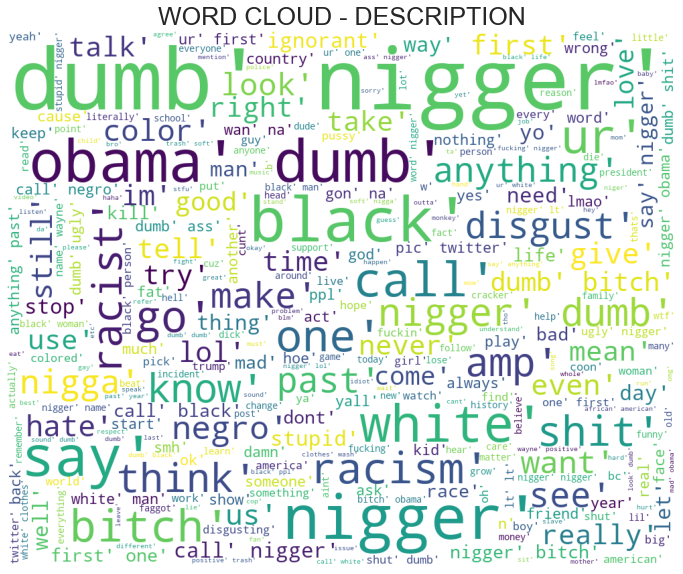

In [37]:
stopwords = set(STOPWORDS)

newStopWords = []
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(' '.join(ethnicity_cb['Cleaned_Tweets'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Religion

In [38]:
religion_cb = dataset.loc[(dataset['cyberbullying_type']) == "religion",['tweet_text','Cleaned_Tweets','cyberbullying_type',]]

In [39]:
religion_cb = religion_cb.reset_index()

In [40]:
religion_cb_tweets = []
for i in range(len(religion_cb['Cleaned_Tweets'])):
    religion_cb_tweets.extend(religion_cb['Cleaned_Tweets'][i])

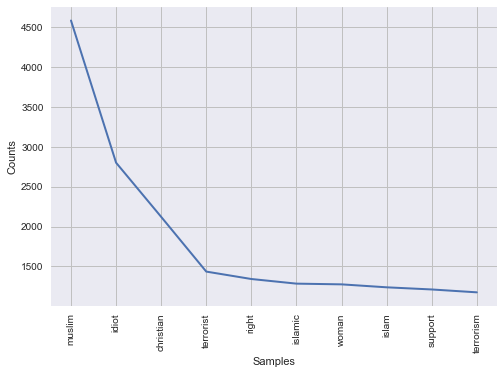

In [41]:
graph(religion_cb_tweets)

In [42]:
graph_bar(religion_cb_tweets,'Religion')

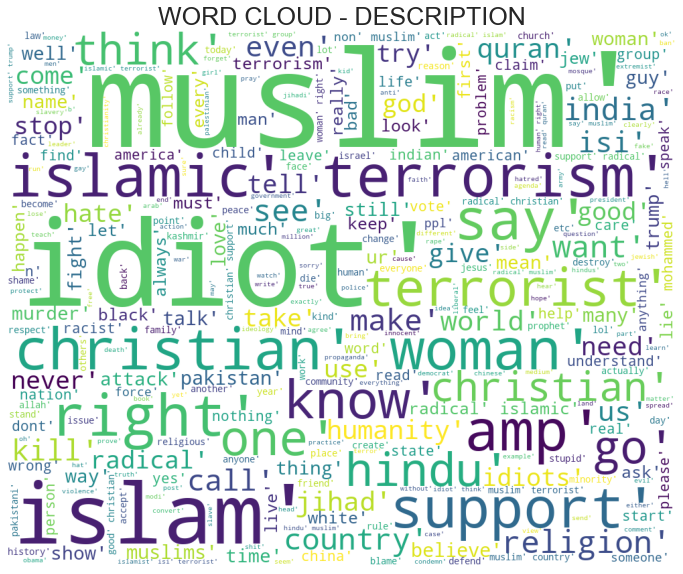

In [43]:
stopwords = set(STOPWORDS)

newStopWords = []
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(' '.join(religion_cb['Cleaned_Tweets'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Age

In [44]:
age_cb = dataset.loc[(dataset['cyberbullying_type']) == "age",['tweet_text','Cleaned_Tweets','cyberbullying_type',]]

In [45]:
age_cb = age_cb.reset_index()

In [46]:
age_cb_tweets = []
for i in range(len(age_cb['Cleaned_Tweets'])):
    age_cb_tweets.extend(age_cb['Cleaned_Tweets'][i])

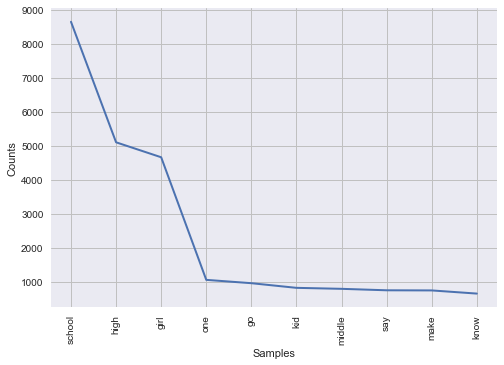

In [47]:
graph(age_cb_tweets)

In [48]:
graph_bar(age_cb_tweets,'Age')

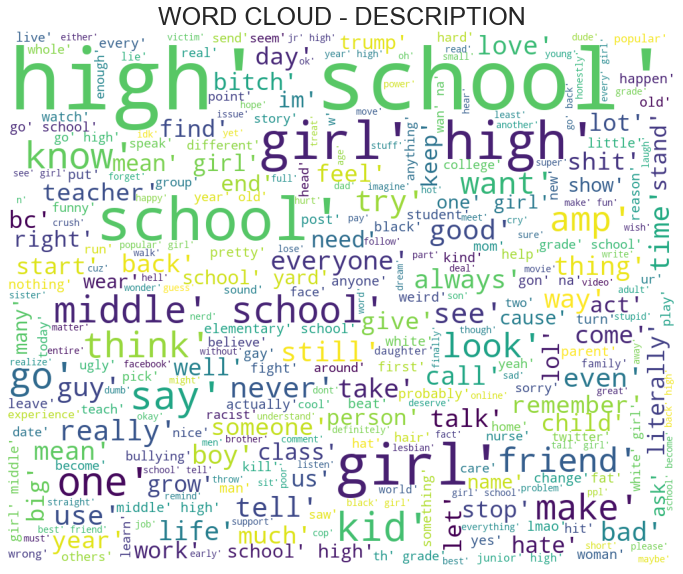

In [49]:
stopwords = set(STOPWORDS)

newStopWords = []
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(' '.join(age_cb['Cleaned_Tweets'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Gender

In [50]:
gender_cb = dataset.loc[(dataset['cyberbullying_type']) == "gender",['tweet_text','Cleaned_Tweets','cyberbullying_type',]]

In [51]:
gender_cb= gender_cb.reset_index()

In [52]:
gender_cb_tweets = []
for i in range(len(gender_cb['Cleaned_Tweets'])):
    gender_cb_tweets.extend(gender_cb['Cleaned_Tweets'][i])

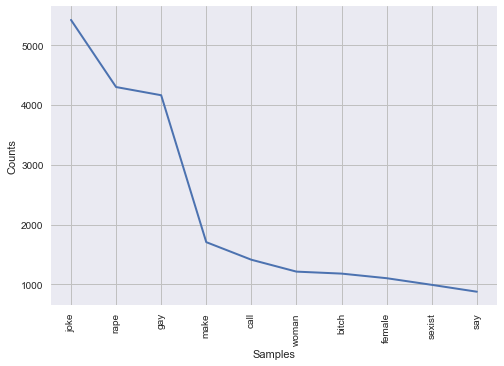

In [53]:
graph(gender_cb_tweets)

In [54]:
graph_bar(gender_cb_tweets,'Gender')

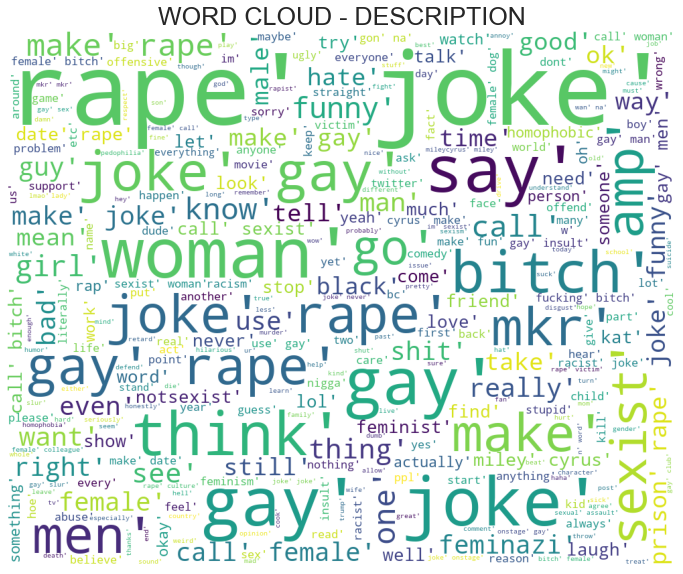

In [55]:
stopwords = set(STOPWORDS)

newStopWords = []
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(' '.join(gender_cb['Cleaned_Tweets'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Other CB

In [56]:
other_cb = dataset.loc[(dataset['cyberbullying_type']) == "other_cyberbullying",['tweet_text','Cleaned_Tweets','cyberbullying_type',]]

In [57]:
other_cb =other_cb.reset_index()

In [58]:
other_cb_tweets = []
for i in range(len(other_cb['Cleaned_Tweets'])):
    other_cb_tweets.extend(other_cb['Cleaned_Tweets'][i])

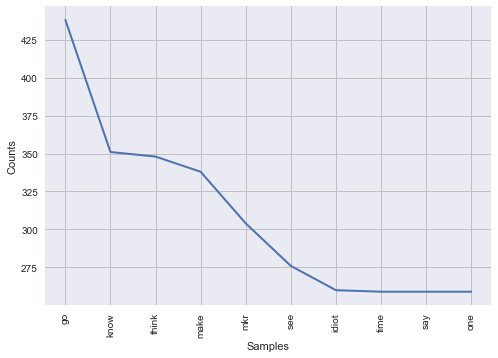

In [59]:
graph(other_cb_tweets)

In [105]:
graph_bar(other_cb_tweets,'Other')

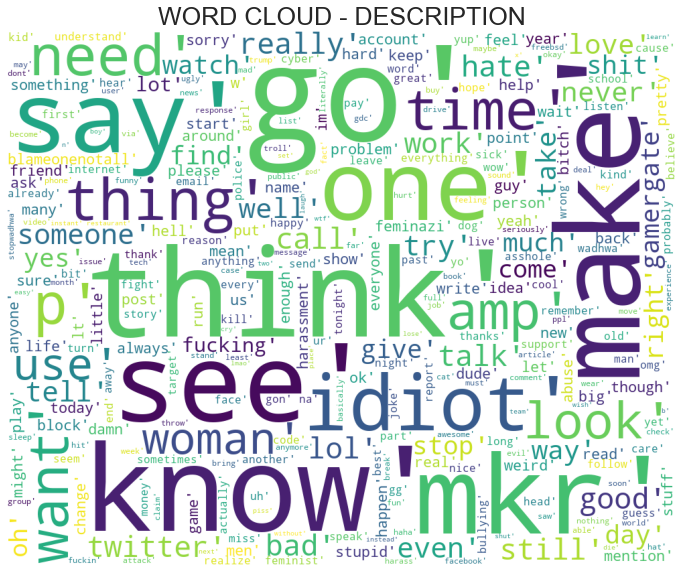

In [61]:
stopwords = set(STOPWORDS)

newStopWords = []
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(' '.join(other_cb['Cleaned_Tweets'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

In [62]:
dataset.head()

index                                         tweet_text  \
0      0  In other words #katandandre, your food was cra...   
1      1  Why is #aussietv so white? #MKR #theblock #ImA...   
2      2  @XochitlSuckkks a classy whore? Or more red ve...   
3      3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4      4  @RudhoeEnglish This is an ISIS account pretend...   

  cyberbullying_type                                     Cleaned_Tweets  \
0  not_cyberbullying       [word, katandandre, food, crapilicious, mkr]   
1  not_cyberbullying  [aussietv, white, mkr, theblock, imacelebritya...   
2  not_cyberbullying              [classy, whore, red, velvet, cupcake]   
3  not_cyberbullying  [meh, p, thanks, head, concern, another, angry...   
4  not_cyberbullying  [isi, account, pretend, kurdish, account, isla...   

                                          POS_tagged  
0  [(words, n), (katandandre, v), (food, n), (cra...  
1  [(aussietv, r), (white, a), (mkr, n), (thebloc...  
2  [(classy, a), (whore, n), (red, a), (velvet, n...  
3  [(meh, n), (p, n), (thanks, n), (heads, n), (c...  
4  [(isis, n), (account, n), (pretending, v), (ku...

# Predicción

# Detección de Cyberbullying 

In [63]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
def join(text):
    text = " ".join(text)
    return text

In [65]:
def cyberbull(tag):
    if tag == 'not_cyberbullying':
        return 'not_cyberbullying'
    else:
        return 'cyberbullying'

In [66]:
dataset["Cleaned_Tweets"] = dataset["Cleaned_Tweets"].apply(join)

In [67]:
dataset = dataset.drop(['index','POS_tagged'], axis=1)

In [68]:
dataset.head()

tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                      Cleaned_Tweets  
0             word katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                    classy whore red velvet cupcake  
3  meh p thanks head concern another angry dude t...  
4      isi account pretend kurdish account islam lie

In [69]:
dataset["CB_tag"] = dataset["cyberbullying_type"].apply(cyberbull)

In [70]:
processed_features = dataset['Cleaned_Tweets']
labels = dataset['CB_tag']

In [71]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [72]:
pd.DataFrame(processed_features).head()

0     1     2     3     4     5     6     7     8     9     ...  2490  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2491  2492  2493  2494  2495  2496  2497  2498  2499  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2500 columns]

In [73]:
labels.value_counts()

cyberbullying        39747
not_cyberbullying     7945
Name: CB_tag, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE 

In [75]:
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(processed_features, labels)

In [76]:
y_res.value_counts()

not_cyberbullying    39747
cyberbullying        39747
Name: CB_tag, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [79]:
predictions = text_classifier.predict(X_test)

In [80]:
import seaborn as sns

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predictions)

Text(0.5, 29.5, 'Predicted label')

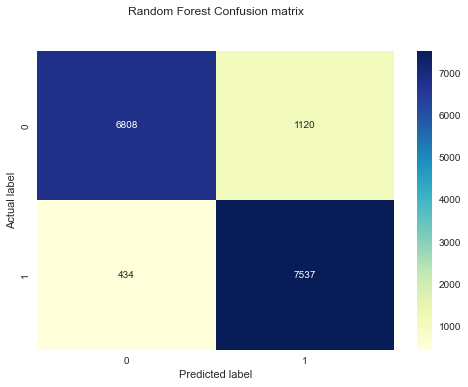

In [82]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

                   precision    recall  f1-score   support

    cyberbullying       0.94      0.86      0.90      7928
not_cyberbullying       0.87      0.95      0.91      7971

         accuracy                           0.90     15899
        macro avg       0.91      0.90      0.90     15899
     weighted avg       0.91      0.90      0.90     15899

0.9022580036480282


# Multinomial Naive-Bayes

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
text_classifier = MultinomialNB()

In [86]:
text_classifier.fit(X_train, y_train)

MultinomialNB()

In [87]:
predictions = text_classifier.predict(X_test)

Text(0.5, 29.5, 'Predicted label')

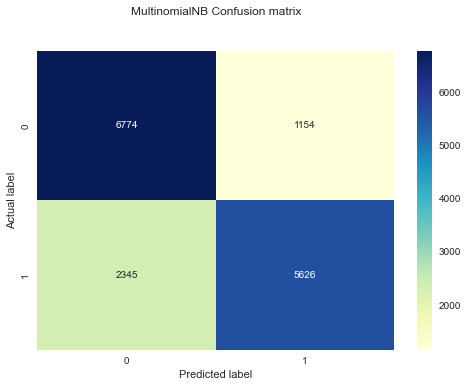

In [88]:
cm = confusion_matrix(y_test,predictions)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('MultinomialNB Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [89]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

                   precision    recall  f1-score   support

    cyberbullying       0.74      0.85      0.79      7928
not_cyberbullying       0.83      0.71      0.76      7971

         accuracy                           0.78     15899
        macro avg       0.79      0.78      0.78     15899
     weighted avg       0.79      0.78      0.78     15899

0.7799232656141896


# Detección de tipos de cyberbullying

In [90]:
processed_features = dataset['Cleaned_Tweets']
labels = dataset['cyberbullying_type']

In [91]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [92]:
pd.DataFrame(processed_features).head()

0     1     2     3     4     5     6     7     8     9     ...  2490  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2491  2492  2493  2494  2495  2496  2497  2498  2499  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2500 columns]

In [93]:
labels.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Random Forest

In [95]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [96]:
predictions = text_classifier.predict(X_test)

In [97]:
cm = confusion_matrix(y_test,predictions)

Text(0.5, 29.5, 'Predicted label')

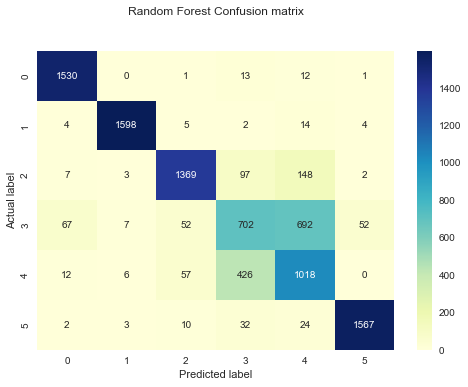

In [98]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [99]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

                     precision    recall  f1-score   support

                age       0.94      0.98      0.96      1557
          ethnicity       0.99      0.98      0.99      1627
             gender       0.92      0.84      0.88      1626
  not_cyberbullying       0.55      0.45      0.49      1572
other_cyberbullying       0.53      0.67      0.59      1519
           religion       0.96      0.96      0.96      1638

           accuracy                           0.82      9539
          macro avg       0.82      0.81      0.81      9539
       weighted avg       0.82      0.82      0.82      9539

0.8160184505713387


# Multinomial Naive-Bayes

In [100]:
text_classifier = MultinomialNB()

In [101]:
text_classifier.fit(X_train, y_train)

MultinomialNB()

In [102]:
predictions = text_classifier.predict(X_test)

Text(0.5, 29.5, 'Predicted label')

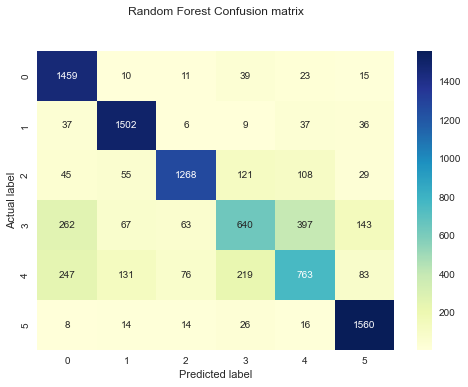

In [103]:
cm = confusion_matrix(y_test,predictions)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [104]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

                     precision    recall  f1-score   support

                age       0.71      0.94      0.81      1557
          ethnicity       0.84      0.92      0.88      1627
             gender       0.88      0.78      0.83      1626
  not_cyberbullying       0.61      0.41      0.49      1572
other_cyberbullying       0.57      0.50      0.53      1519
           religion       0.84      0.95      0.89      1638

           accuracy                           0.75      9539
          macro avg       0.74      0.75      0.74      9539
       weighted avg       0.74      0.75      0.74      9539

0.7539574378865709
